Dummy variables tecqunicque to predict the price of different model car

In [89]:
import pandas as pd
import numpy as np
df=pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


first try to understand which model i can apply by viewing the scatterplot for every feature

C:\Users\adelz\AppData\Local\Temp\ipykernel_25484\2555279723.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')(range(len(car_models)))


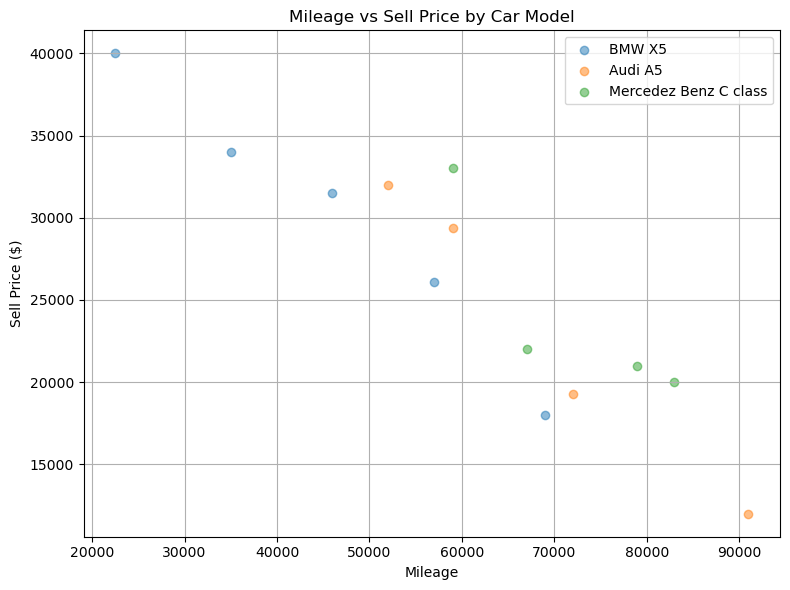

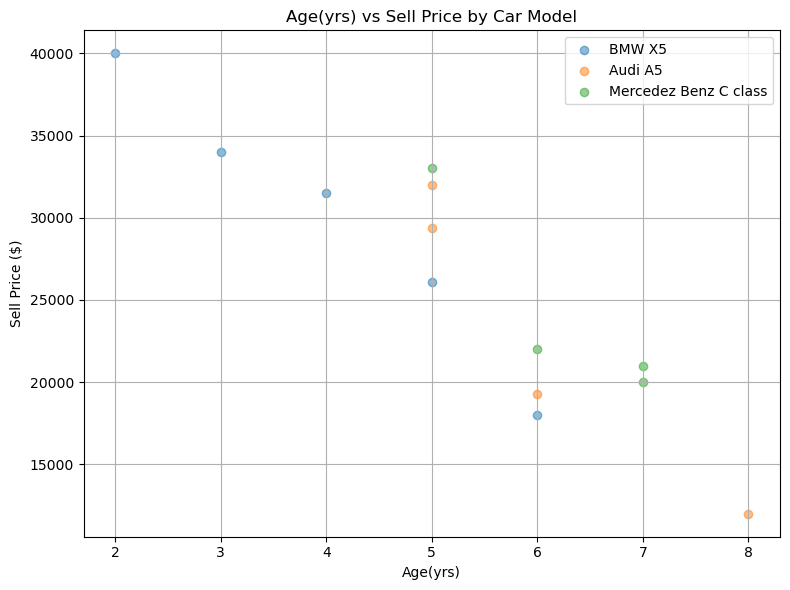

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_features_vs_price_by_model(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Define features to plot against Sell Price (excluding Car Model)
    features = ['Mileage', 'Age(yrs)']
    target = 'Sell Price($)'
    
    # Get unique car models
    car_models = df['Car Model'].unique()
    
    # Define colors for different car models
    colors = plt.cm.get_cmap('tab10')(range(len(car_models)))
    
    # Create scatter plots for each feature
    for feature in features:
        plt.figure(figsize=(8, 6))
        for i, model in enumerate(car_models):
            # Filter data for the current car model
            model_data = df[df['Car Model'] == model]
            plt.scatter(model_data[feature], model_data[target], 
                       c=[colors[i]], label=model, alpha=0.5)
        
        plt.xlabel(feature)
        plt.ylabel('Sell Price ($)')
        plt.title(f'{feature} vs Sell Price by Car Model')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Call the function with the CSV file
plot_features_vs_price_by_model('carprices.csv')

Finding the corelation between the mileage and age(yrs)

Pearson correlation between Mileage and Age(yrs): 0.993


C:\Users\adelz\AppData\Local\Temp\ipykernel_25484\40637365.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')(range(len(car_models)))


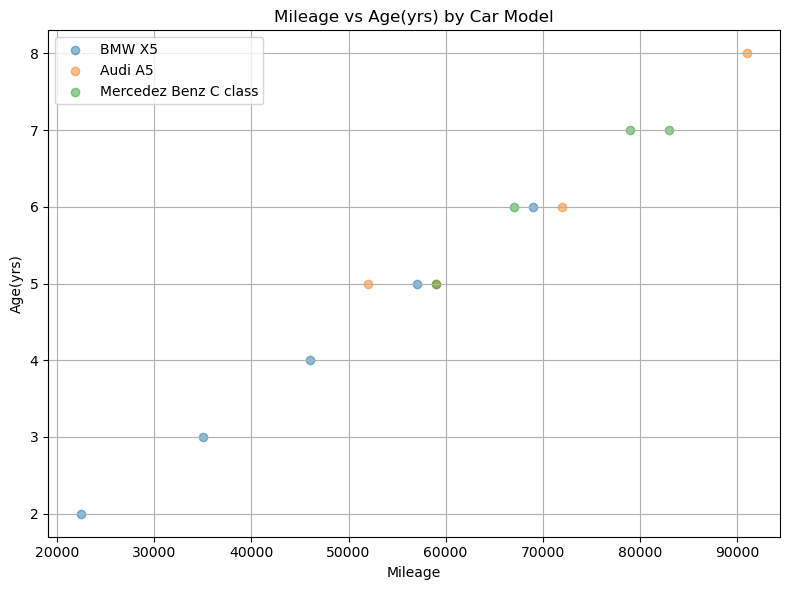

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_correlation_and_plot(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Calculate Pearson correlation between Mileage and Age(yrs)
    correlation = df['Mileage'].corr(df['Age(yrs)'])
    print(f"Pearson correlation between Mileage and Age(yrs): {correlation:.3f}")
    
    # Define features to plot against Sell Price and for correlation
    features = ['Mileage', 'Age(yrs)']
    target = 'Sell Price($)'
    
    # Get unique car models
    car_models = df['Car Model'].unique()
    
    # Define colors for different car models
    colors = plt.cm.get_cmap('tab10')(range(len(car_models)))

    # Create scatter plot for Mileage vs Age(yrs) to visualize correlation
    plt.figure(figsize=(8, 6))
    for i, model in enumerate(car_models):
        model_data = df[df['Car Model'] == model]
        plt.scatter(model_data['Mileage'], model_data['Age(yrs)'], 
        c=[colors[i]], label=model, alpha=0.5)
    
    plt.xlabel('Mileage')
    plt.ylabel('Age(yrs)')
    plt.title('Mileage vs Age(yrs) by Car Model')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with the CSV file
analyze_correlation_and_plot('carprices.csv')

Merge the corelation

In [92]:
correlation = df['Mileage'].corr(df['Age(yrs)'])
print(f"Pearson correlation between Mileage and Age(yrs): {correlation:.3f}")
    
# Create a new column: Mileage * Age(yrs) as a combined feature
df['Mileage_Age_Product'] = df['Mileage'] * df['Age(yrs)']
df

Pearson correlation between Mileage and Age(yrs): 0.993


,Car Model,Mileage,Sell Price($),Age(yrs),Mileage_Age_Product
0,BMW X5,69000,18000,6,414000
1,BMW X5,35000,34000,3,105000
2,BMW X5,57000,26100,5,285000
3,BMW X5,22500,40000,2,45000
4,BMW X5,46000,31500,4,184000
5,Audi A5,59000,29400,5,295000
6,Audi A5,52000,32000,5,260000
7,Audi A5,72000,19300,6,432000
8,Audi A5,91000,12000,8,728000
9,Mercedez Benz C class,67000,22000,6,402000


C:\Users\adelz\AppData\Local\Temp\ipykernel_25484\754327367.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')(range(len(car_models)))


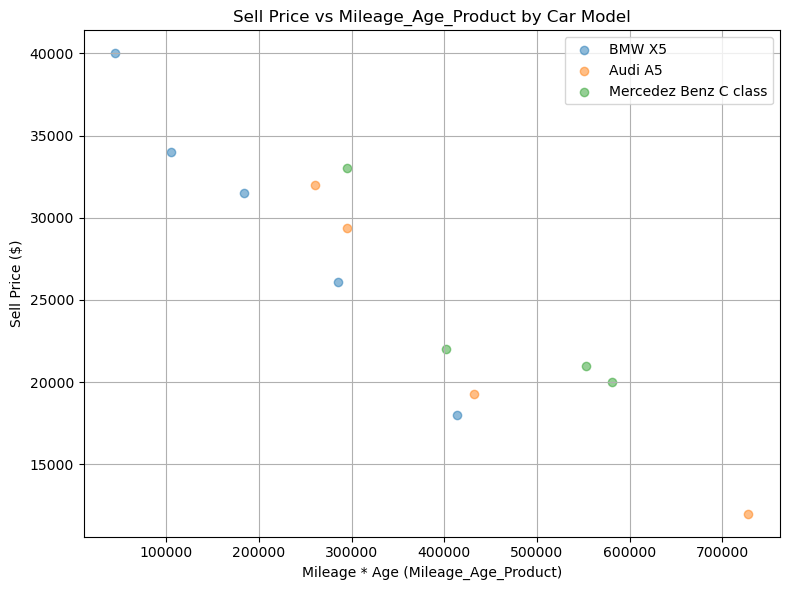

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_price_vs_mileage_age_product(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Create the Mileage_Age_Product column
    df['Mileage_Age_Product'] = df['Mileage'] * df['Age(yrs)']
    
    # Define the feature and target
    feature = 'Mileage_Age_Product'
    target = 'Sell Price($)'
    
    # Get unique car models
    car_models = df['Car Model'].unique()
    
    # Define colors for different car models
    colors = plt.cm.get_cmap('tab10')(range(len(car_models)))
    
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    for i, model in enumerate(car_models):
        model_data = df[df['Car Model'] == model]
        plt.scatter(model_data[feature], model_data[target], 
                   c=[colors[i]], label=model, alpha=0.5)
    
    plt.xlabel('Mileage * Age (Mileage_Age_Product)')
    plt.ylabel('Sell Price ($)')
    plt.title('Sell Price vs Mileage_Age_Product by Car Model')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with the CSV file
plot_price_vs_mileage_age_product('carprices.csv')

C:\Users\adelz\AppData\Local\Temp\ipykernel_25484\559086900.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10')(range(len(car_models)))


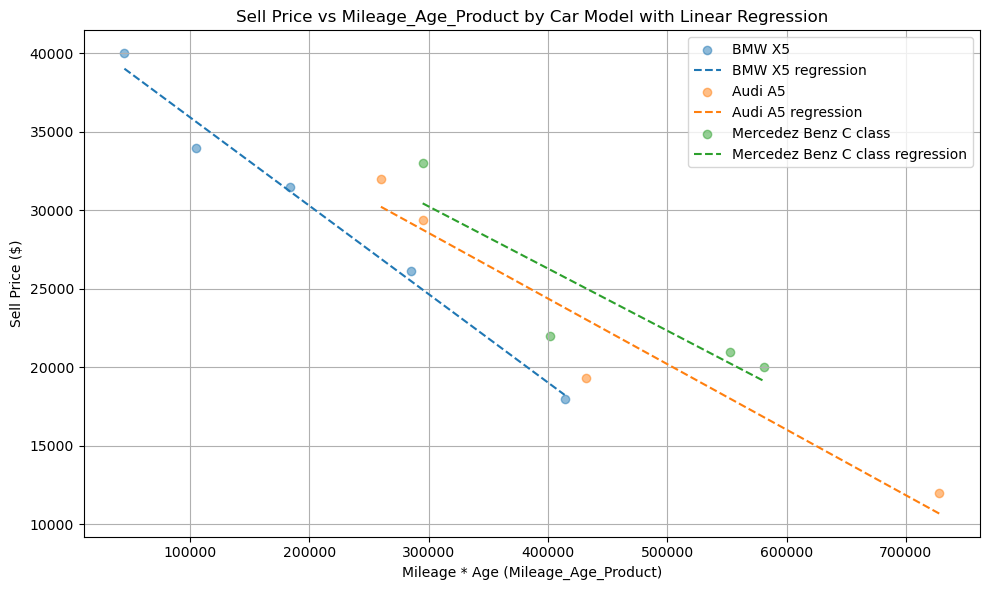

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_price_vs_mileage_age_with_regression(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Create the Mileage_Age_Product column
    df['Mileage_Age_Product'] = df['Mileage'] * df['Age(yrs)']
    
    # Define the feature and target
    feature = 'Mileage_Age_Product'
    target = 'Sell Price($)'
    
    # Get unique car models
    car_models = df['Car Model'].unique()
    
    # Define colors for different car models
    colors = plt.cm.get_cmap('tab10')(range(len(car_models)))
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    for i, model in enumerate(car_models):
        # Filter data for the current car model
        model_data = df[df['Car Model'] == model]
        x = model_data[feature]
        y = model_data[target]
        
        # Scatter plot for the model
        plt.scatter(x, y, c=[colors[i]], label=model, alpha=0.5)
        
        # Calculate linear regression
        coeffs = np.polyfit(x, y, 1)  # Degree 1 for linear regression
        slope, intercept = coeffs
        regression_line = np.poly1d(coeffs)
        
        # Generate points for regression line
        x_range = np.linspace(x.min(), x.max(), 100)
        plt.plot(x_range, regression_line(x_range), color=colors[i], 
                 linestyle='--', label=f'{model} regression')
    
    plt.xlabel('Mileage * Age (Mileage_Age_Product)')
    plt.ylabel('Sell Price ($)')
    plt.title('Sell Price vs Mileage_Age_Product by Car Model with Linear Regression')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function with the CSV file
plot_price_vs_mileage_age_with_regression('carprices.csv')

In [95]:
dummies=pd.get_dummies(df['Car Model']).astype(int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [96]:
df_dums=pd.concat([df,dummies],axis='columns')
df=df_dums
df

,Car Model,Mileage,Sell Price($),Age(yrs),Mileage_Age_Product,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,414000,0,1,0
1,BMW X5,35000,34000,3,105000,0,1,0
2,BMW X5,57000,26100,5,285000,0,1,0
3,BMW X5,22500,40000,2,45000,0,1,0
4,BMW X5,46000,31500,4,184000,0,1,0
5,Audi A5,59000,29400,5,295000,1,0,0
6,Audi A5,52000,32000,5,260000,1,0,0
7,Audi A5,72000,19300,6,432000,1,0,0
8,Audi A5,91000,12000,8,728000,1,0,0
9,Mercedez Benz C class,67000,22000,6,402000,0,0,1


In [97]:
df_dums.drop(['Car Model','BMW X5','Mileage_Age_Product'],axis='columns',inplace=True)
df_dums

,Mileage,Sell Price($),Age(yrs),Audi A5,Mercedez Benz C class
0,69000,18000,6,0,0
1,35000,34000,3,0,0
2,57000,26100,5,0,0
3,22500,40000,2,0,0
4,46000,31500,4,0,0
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,1


In [98]:
x=df_dums.drop(['Sell Price($)'],axis='columns')
x

,Mileage,Age(yrs),Audi A5,Mercedez Benz C class
0,69000,6,0,0
1,35000,3,0,0
2,57000,5,0,0
3,22500,2,0,0
4,46000,4,0,0
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,1


In [99]:
y=df_dums['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [100]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x,y)
model.predict([[45000,4,0,1]])

c:\Users\adelz\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721031])

In [101]:
model.score(x,y)

0.9417050937281083

Using sklearn OneHotEncodeing


In [105]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=pd.read_csv('carprices.csv')
dfle=df
dfle['Car Model']=le.fit_transform(dfle['Car Model'])
dfle


,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [107]:
X=dfle.drop(['Sell Price($)'],axis='columns').values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [108]:
Y=dfle['Sell Price($)'].values
Y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [111]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np


ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

car_model_Col=X[:,0].reshape(-1,1)

Car_model_enc= ohe.fit_transform(car_model_Col)

X= np.hstack([Car_model_enc,X[:,1].reshape(-1,1)])

X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04]])

In [112]:
X=X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04],
       [1.00e+00, 0.00e+00, 3.50e+04],
       [1.00e+00, 0.00e+00, 5.70e+04],
       [1.00e+00, 0.00e+00, 2.25e+04],
       [1.00e+00, 0.00e+00, 4.60e+04],
       [0.00e+00, 0.00e+00, 5.90e+04],
       [0.00e+00, 0.00e+00, 5.20e+04],
       [0.00e+00, 0.00e+00, 7.20e+04],
       [0.00e+00, 0.00e+00, 9.10e+04],
       [0.00e+00, 1.00e+00, 6.70e+04],
       [0.00e+00, 1.00e+00, 8.30e+04],
       [0.00e+00, 1.00e+00, 7.90e+04],
       [0.00e+00, 1.00e+00, 5.90e+04]])

In [115]:
model.fit(X,Y)
model.predict([[2,45000,4]])

array([1.13199378e+08])